In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # basic plotting 
import numpy as np # linear algebra
import geopandas as gpd # geospatial data
from scipy import stats as st # probability distributions and statistical functions
import seaborn as sns #data visualization library based on matplotlib
import folium #interactive leaflet map

from folium.plugins import FloatImage

from matplotlib.colors import ListedColormap
from shapely.geometry import Point
from sklearn import preprocessing

# Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline 
plt.style.use('ggplot') # use ggplot style
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
#sns.mpl.rc('figure', figsize=(30,15))

In [2]:
def open_data():
    df = pd.read_csv("../raw_data/kc_house_data 2.csv", parse_dates=['date'])
    return df

In [13]:
def bedroom_outliers():
    df = open_data()
    df = df[(df['bedrooms']>=1) & (df['bedrooms']<11)]
    return df

In [16]:
df = bedroom_outliers()
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 10])

In [17]:
x = bedroom_outliers()
x

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
def bedroom_price():
    df = bedroom_outliers()
    df_bed = df[['price', 'bedrooms']]
    df_bed.bedrooms.unique() # Check unique categories in bedrooms
    print (df_bed)
#     bedrooms_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder
#     bedrooms_ohe.fit(df_bed[['bedrooms']]) # Fit one hot encoder
#     bedrooms_ohe.categories_ # View categories of bedrooms
    
#     df_bed['bed1'], df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]) # Put encoded columns back in dataframe
#     #
#     print (bedrooms_ohe)

    #df_bed.drop(columns=['bedrooms'], inplace = True) # Drop original column

#     # Apply price into each bedroom column
#     df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
#     df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
#     df_bed['bed3_price'] = df_bed['bed3']*df_bed['price']
#     df_bed['bed4_price'] = df_bed['bed4']*df_bed['price']
#     df_bed['bed5_price'] = df_bed['bed5']*df_bed['price']
#     df_bed['bed6_price'] = df_bed['bed6']*df_bed['price']
#     df_bed['bed7_price'] = df_bed['bed7']*df_bed['price']
#     df_bed['bed8_price'] = df_bed['bed8']*df_bed['price']
#     df_bed['bed9_price'] = df_bed['bed9']*df_bed['price']
#     df_bed['bed10_price'] = df_bed['bed10']*df_bed['price']
    
#     df_bed_price = df_bed[['bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
#        'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
#        'bed10_price']]
    
#     x = df_bed_price.mean() + df_bed_price.std()
#     y = df_bed_price.mean() - df_bed_price.std()

#     plt.plot(x, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue" )
#     plt.plot(y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
#     plt.plot(df_bed_price.mean(), marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
#     plt.plot(df_bed_price.median(), marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red");
    
#     plt.show() 

In [6]:
bedroom_price()

          price  bedrooms
0      221900.0         3
1      538000.0         3
2      180000.0         2
3      604000.0         4
4      510000.0         3
...         ...       ...
21608  360000.0         3
21609  400000.0         4
21610  402101.0         2
21611  400000.0         3
21612  325000.0         2

[21613 rows x 2 columns]


In [7]:
x = bedroom_price()

          price  bedrooms
0      221900.0         3
1      538000.0         3
2      180000.0         2
3      604000.0         4
4      510000.0         3
...         ...       ...
21608  360000.0         3
21609  400000.0         4
21610  402101.0         2
21611  400000.0         3
21612  325000.0         2

[21613 rows x 2 columns]


/var/folders/s2/rxgrts2d0x3cngcs6yc5fmr40000gn/T/ipykernel_30610/1661901236.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe
/Users/vanessalieberg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/fold

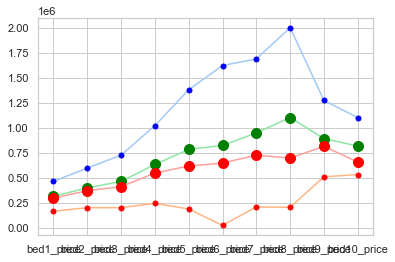

In [24]:
df = bedroom_outliers()
df_bed = df[['price', 'bedrooms']]
#df_bed.bedrooms.unique() # Check unique categories in bedrooms

bedrooms_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

bedrooms_ohe.fit(df_bed[['bedrooms']]) # Fit one hot encoder

bedrooms_ohe.categories_ # View categories of bedrooms

df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe

df_bed.drop(columns=['bedrooms'], inplace = True) # Drop original column


# Apply price into each bedroom column
df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
df_bed['bed3_price'] = df_bed['bed3']*df_bed['price']
df_bed['bed4_price'] = df_bed['bed4']*df_bed['price']
df_bed['bed5_price'] = df_bed['bed5']*df_bed['price']
df_bed['bed6_price'] = df_bed['bed6']*df_bed['price']
df_bed['bed7_price'] = df_bed['bed7']*df_bed['price']
df_bed['bed8_price'] = df_bed['bed8']*df_bed['price']
df_bed['bed9_price'] = df_bed['bed9']*df_bed['price']
df_bed['bed10_price'] = df_bed['bed10']*df_bed['price']

df_bed_price = df_bed[['bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
   'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
   'bed10_price']]
df_bed_price.mask(df_bed_price == 0, other = np.nan, inplace=True)

x = df_bed_price.mean() + df_bed_price.std()
y = df_bed_price.mean() - df_bed_price.std()

plt.plot(x, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue" )
plt.plot(y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(df_bed_price.mean(), marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
plt.plot(df_bed_price.median(), marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red");

plt.show() 